           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

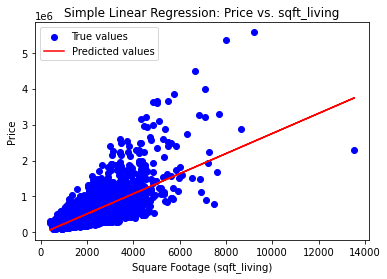

Multiple Linear Regression - Mean Squared Error: 73287795746.3108
Multiple Linear Regression - R^2 Score: 0.5152176902630924


In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


data = pd.read_csv('House_price_prediction.csv')


print(data.head())


X_simple = data['sqft_living'].values.reshape(-1,1)
y = data['price'].values


X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)


simple_model = LinearRegression()
simple_model.fit(X_train, y_train)


y_pred_simple = simple_model.predict(X_test)

mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

print(f"Simple Linear Regression - Mean Squared Error: {mse_simple}")
print(f"Simple Linear Regression - R^2 Score: {r2_simple}")


plt.scatter(X_test, y_test, color='blue', label='True values')
plt.plot(X_test, y_pred_simple, color='red', label='Predicted values')
plt.title('Simple Linear Regression: Price vs. sqft_living')
plt.xlabel('Square Footage (sqft_living)')
plt.ylabel('Price')
plt.legend()
plt.show()


X_multiple = data[['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'zipcode']]
y = data['price']


X_train, X_test, y_train, y_test = train_test_split(X_multiple, y, test_size=0.2, random_state=42)


multiple_model = LinearRegression()
multiple_model.fit(X_train, y_train)


y_pred_multiple = multiple_model.predict(X_test)



mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print(f"Multiple Linear Regression - Mean Squared Error: {mse_multiple}")
print(f"Multiple Linear Regression - R^2 Score: {r2_multiple}")
